In [1]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


In [8]:
X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

In [10]:
#bagged decision tree for classification
kfold = KFold(n_splits=10)
num_trees = 100
model = BaggingClassifier( max_samples=0.8, n_estimators=num_trees, random_state=8)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7433333333333334


In [11]:
results

array([0.75      , 0.76666667, 0.66666667, 0.68333333, 0.76666667,
       0.65      , 0.81666667, 0.71666667, 0.75      , 0.86666667])

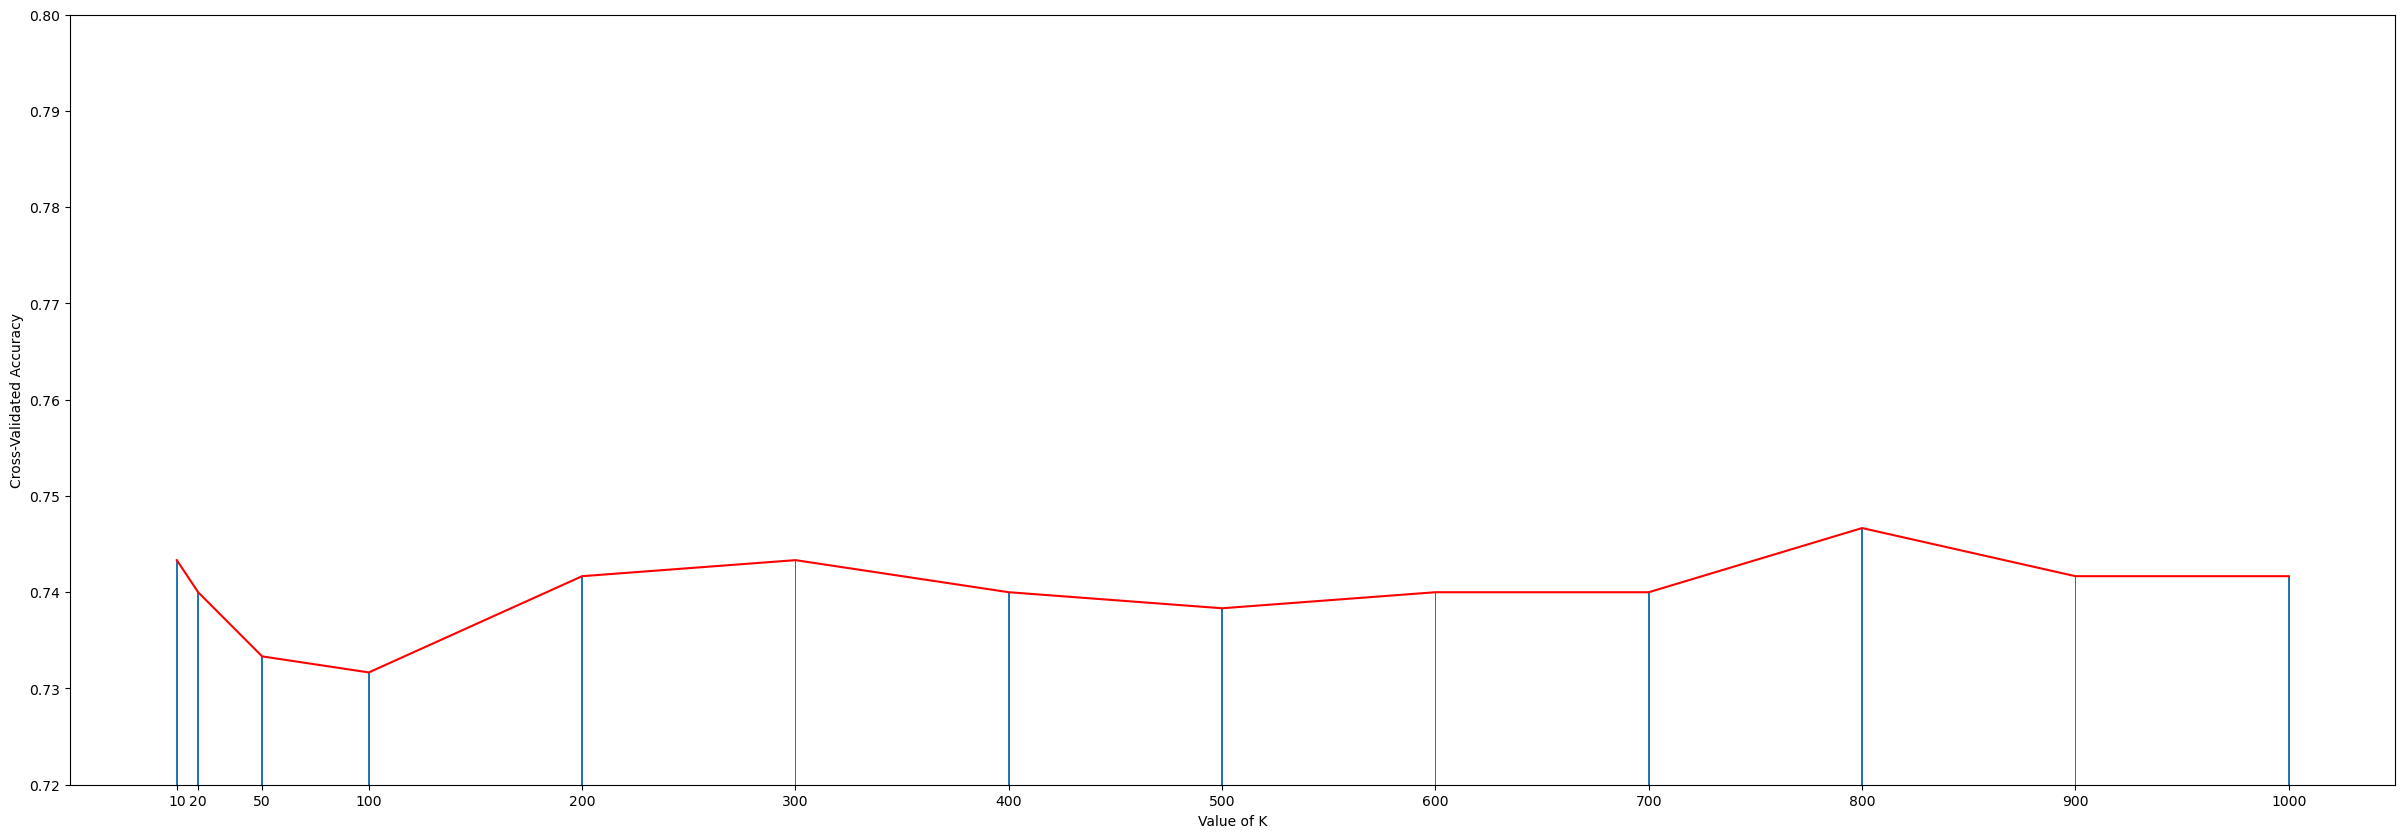

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = [10, 20, 50,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
sorted(k_range)
k_scores = []

X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']

for k in k_range:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X, y, cv=10)
    k_scores.append(scores.mean())
    
plt.figure(figsize=(30, 10))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color="red")
plt.xlabel('Value of K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.72, .8)
plt.show()

In [17]:
# At 800 we get the optimal output.

In [19]:
#Random Forest Classification
X = data.drop(columns=['Taxable.Income'])
y = data['Taxable.Income']
num_trees = 800
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier( n_estimators=num_trees, max_samples=0.8, max_features=max_features, random_state=8)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7516666666666667


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=800, random_state=8)

In [23]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=8)

In [26]:
y_pred = rf_classifier.predict(X_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7583333333333333


<Axes: xlabel='Taxable.Income', ylabel='count'>

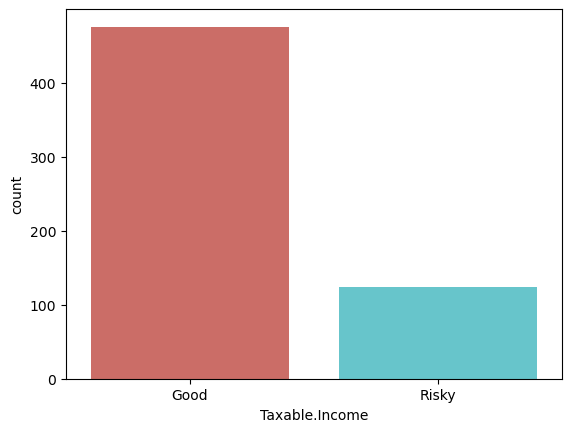

In [28]:
import seaborn as sn
sn.countplot(x="Taxable.Income" ,data=data ,palette="hls")
#using this vizualization we can count how many clients are good and how many are risky

In [29]:
#By observing the countplot above we can conclude that majority of clients are good while there are some clients that are risky